<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/supervised/linear_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [3]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Regresja liniowa przy użyciu scikit-learn](#2)
4. [Wizualizacja graficzna modelu](#3)
5. [Współczynnik R2](#4)
6. [Końcowa postać modelu](#5)
7. [Regresja z podziałem na zbiór treningowy oraz testowy](#6)
8. [Regresja liniowa - zbiór treningowy - wizualizacja](#7)
9. [Regresja liniowa - zbiór testowy - wizualizacja](#8)
10. [Predykcja na podstawie modelu](#9)

###<a name='0'></a> Import bibliotek

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6,suppress=True, edgeitems=30,linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

###<a name='1'></a> Wygenerowanie danych

In [5]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1,
                               noise=30.0, random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [6]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [8]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

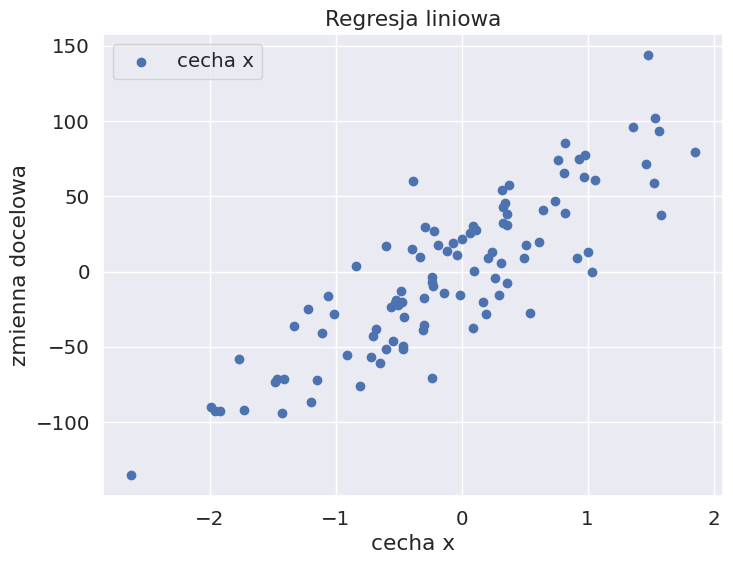

In [9]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

###<a name='2'></a> Regresja liniowa przy użyciu scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# metoda fit() dopasowuje model liniowy do danych
regressor.fit(data,target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data,target)

0.7426670084336404

In [12]:
# metoda predict dokonuje predykcji na podstawie modelu
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

###<a name='3'></a> Wizualizacja graficzna modelu

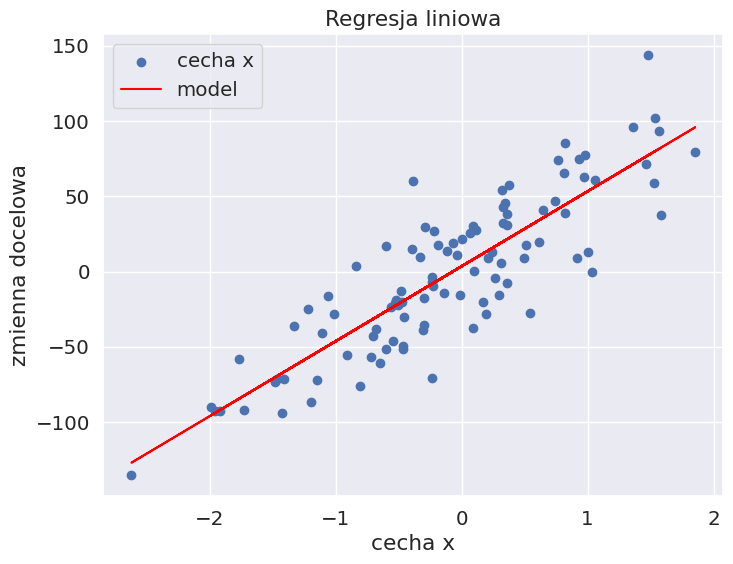

In [13]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data,target,label='cecha x')
plt.plot(data,y_pred,color='red',label='model')
plt.legend()
plt.show()

###<a name='4'></a> Współczynnik R2

In [14]:
regressor.score(data,target)

0.7426670084336404

In [17]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_',
 'tol']

In [18]:
regressor.coef_

array([49.83])

In [19]:
regressor.intercept_

np.float64(3.4953459615809184)

###<a name='5'></a> Końcowa postać modelu

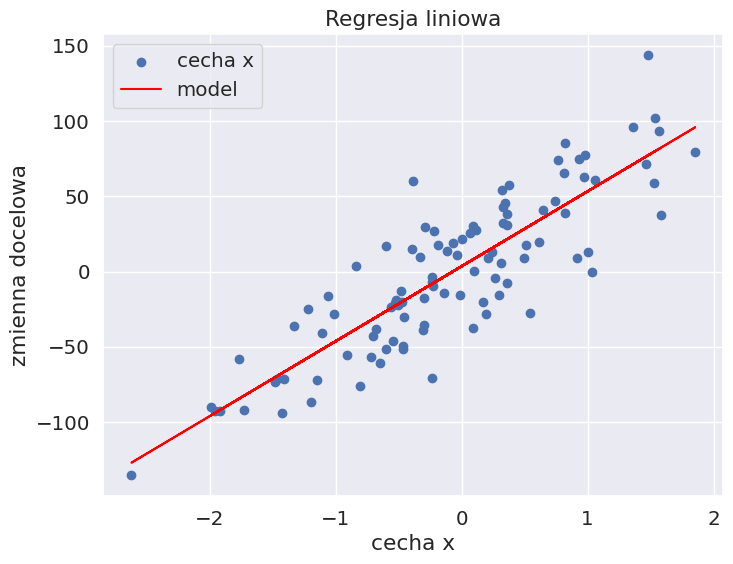

In [20]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data,target,label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_ * data, color='red', label='model')
plt.legend()
plt.show()

###<a name='6'></a> Regresja z podziałem na zbiór treningowy oraz testowy

In [21]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1,
                               noise=15.0, random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


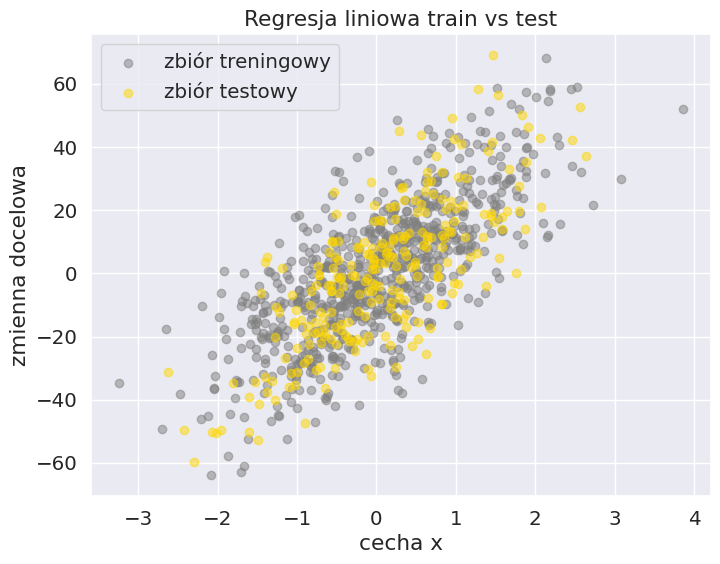

In [24]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa train vs test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train,y_train,label='zbiór treningowy', color='grey', alpha=0.5)
plt.scatter(X_test,y_test,label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.show()

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
regressor.score(X_train, y_train)

0.5408930484049115

In [27]:
regressor.score(X_test, y_test)

0.5502380687566506

###<a name='7'></a> Regresja liniowa - zbiór treningowy - wizualizacja

[]

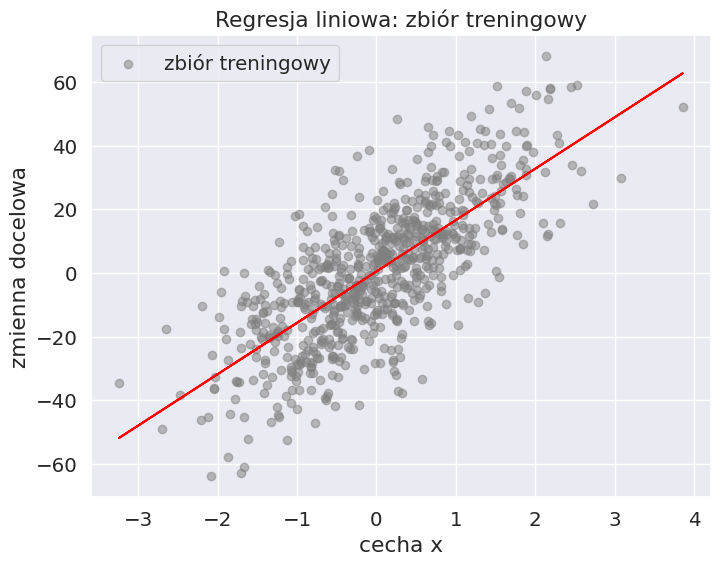

In [31]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa: zbiór treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='grey', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]* X_train, color='red')
plt.legend()
plt.plot()

###<a name=''></a> Regresja liniowa - zbiór testowy - wizualizacja

[]

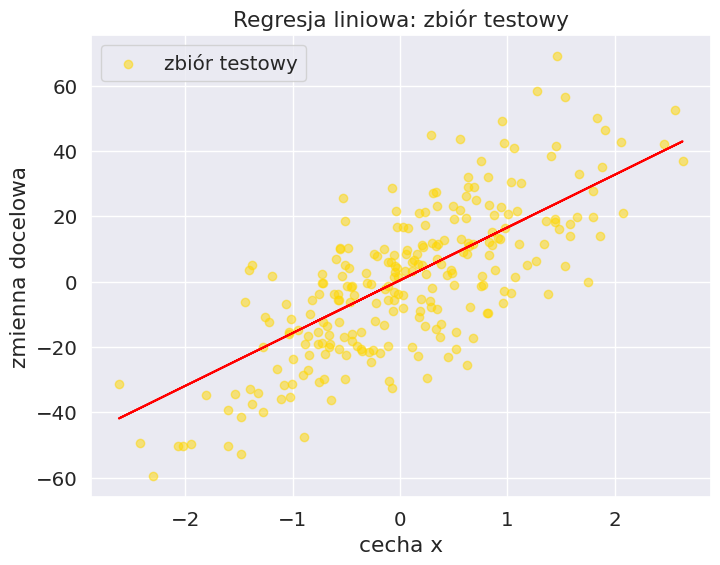

In [32]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa: zbiór testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0]*X_test,color='red')
plt.legend()
plt.plot()

###<a name='9'></a> Predykcja na podstawie modelu

In [33]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-5.602081,-12.767885
1,6.816964,-9.120373
2,-0.869617,8.604327
3,-0.390419,-4.546477
4,24.961278,11.889108


In [34]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-5.602081,-12.767885,7.165805
1,6.816964,-9.120373,15.937337
2,-0.869617,8.604327,-9.473944
3,-0.390419,-4.546477,4.156058
4,24.961278,11.889108,13.072170


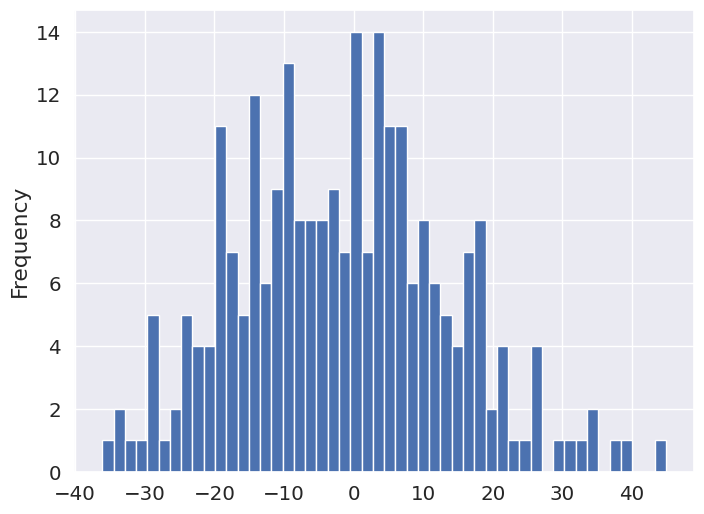

In [35]:
_=predictions['error'].plot(kind='hist', bins=50,figsize=(8,6))